In [5]:
import numpy as np
from scipy import stats
from scipy.stats import dirichlet
import matplotlib.pyplot as plt

## Which of $k$ chip brands sold at a convenience store are "the best"? 

Let $\mathbf x^{(t)}$ be a length $k$ vector counting the number of each kind of chip brand purchased by time $t$ (relative to some start time) on a given day. Assume $\mathbf x$ follows the ***multinomial distribution*** (with $t$ omitted for brevity)

$$p(\mathbf x | \mathbf p) = {\displaystyle {\frac {n!}{x_{1}!\cdots x_{k}!}}p_{1}^{x_{1}}\cdots p_{k}^{x_{k}}}$$

> A ***multinomial distribution*** generalizes the ***binary outcome*** of the ***binomial distribution*** to a ***categorical outcome***. So, a ***multinomial random variable*** also consists of $n$ "trials", but now there are $k$ possible outcomes as opposed to two ("success" or "failure"), and the observed nubmer of each of these outcomes (out of $n$ "trials") are recorded in $\mathbf x$.
> - The ***multinomial distribution*** is parameterized by a "probability vector" $\mathbf p$ of length $k$ which satisfies $\sum_{j=1}^k p_j = 1$ (and $p_j \geq 0$ for all $j$) and where $p_j$ specifies the probabilities of the $j^{th}$ outcome of the $k$ categorical outcomes modeled by the ***multinomial distribution***. 

The ***Dirichlet distribution*** has the form (again omitting $t$ for brevity)

$$f(\mathbf p | \boldsymbol\alpha) = \frac{1}{\mathrm{B}(\boldsymbol\alpha)} \prod_{j=1}^k p_j^{\alpha_j - 1} \quad E[p_j] = \frac{\alpha_j}{\sum_{j=1}^k \alpha_j} \quad \text{Var} [p_j]=\frac {E[p_j](1-E[p_j])}{1 + \sum_{j=1}^k \alpha_j} \quad \text{Cov}_{j\neq i}[p_j,p_i]=-\frac {E[p_j]E[p_i]}{1 + \sum_{j=1}^k \alpha_j}$$

and models a probability vector over a ***simplex***, meaning that $\sum_{j=1}^k p_j = 1$ (and $p_j \geq 0$ for all $j$). 

> A ***Dirichlet distribution*** generalizes a ***beta distribution*** which models a "probability-valued" ***random variable*** which takes on values between $0$ and $1$. So, a ***Dirichlet random variable*** $\mathbf p$ is a vector of $k$ "probabilities" which sum to $1$.
> - The ***Dirichlet distribution*** is parameterized by the length $k$ vector $\boldsymbol\alpha$ where $\alpha_j>0$ for all $j$. As indicated by the expectation, variance, and covariance formulas above, the $\boldsymbol\alpha$ parameter vector controls the behavior of the actualizations of a ***Dirichlet random variable*** $\mathbf p$.  

In [3]:
# Example draw for n=10 from a Multinomial distribution
stats.multinomial(p=[0.2,0.5,0.2,0.1], n=10).rvs(size=1)[0]
# You can re-run the cell a few times to see example actualizations 
# of this multinomial random variable, and note it's relationship to `n`

array([2, 4, 2, 2])

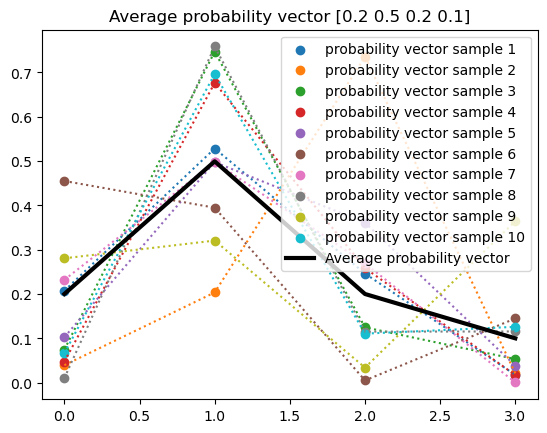

In [4]:
# Example draws from a Dirichlet distribution
plt.figure()
for i in range(10):
    p = stats.dirichlet(alpha=[2,5,2,1]).rvs(size=1)[0]; plt.plot(p, ':')
    plt.scatter(x=[0,1,2,3], y=p, label="probability vector sample "+str(i+1))

p = stats.dirichlet(alpha=[2,5,2,1]).rvs(size=100000).mean(axis=0)
plt.plot(p, 'k', linewidth=3, label="Average probability vector"); 
plt.title("Average probability vector "+str(p.round(3))); plt.legend();

1. [1/2 points] Using the "chips example", describe how the sequence $\mathbf x^{(t)}$ would generally behave over time $t$ assuing time $t=0$ is when the convenience store begins counting chip purchases.

The sequence $x^{t}$ represents the vector of the counts for each chip brand sold at the convenience store at time t. Initially the sequence $x^{t}$ would be a vector of zeros, ad no chips have been sold at the start of the counting. As time progresses, the elements of $x^{t}$ would start to increase, with each element representing the cumualtive count of each chip brand sold up to time t. 

2. [1/2 points] Specify the distribution $p(\mathbf p | \mathbf x^{(t)})$, your belief about the "best chips" at time $t$ according to a Bayesian analysis.


It represents the posterior distribution of the probability vector p given the observed data x^(t) up to time t. This is the updated belief about the popularity of eachchip brand after observing the counts of chips sold.

3. [1/2 point] Provide code which samples from $p(p_j|\mathbf x^{(t)}=[2,5,2,1])$ which is one of the marginal distributions of $p(\mathbf p | \mathbf x^{(t)}=[2,5,2,1])$. 

- Hint 1: You do not have to analytically derive $p(p_j|\mathbf x^{(t)})$. You can sample from it just based on sampling from $p(\mathbf p | \mathbf x^{(t)})$.
- Hint 1: The $\alpha_j$ of the previous question now actually require chosen values. Use $1$ for each. 

In [10]:
# Set the alpha parameter based on the observed counts plus a prior
alpha = np.array([2, 5, 2, 1]) + 1  # Adding 1 for uniform prior

# Set the brand index (Python uses 0-indexing)
j = 1  # For the second brand

# Number of samples
n_samples = 10000

# Draw samples from the Dirichlet distribution
samples = dirichlet(alpha).rvs(size=n_samples)
samples

array([[0.26015581, 0.38727387, 0.14380212, 0.2087682 ],
       [0.41656112, 0.38418174, 0.05103013, 0.14822702],
       [0.13246125, 0.52673222, 0.28055374, 0.0602528 ],
       ...,
       [0.27175526, 0.26807975, 0.20939912, 0.25076587],
       [0.03695722, 0.58125868, 0.25000697, 0.13177713],
       [0.18700704, 0.50358088, 0.21120802, 0.09820406]])

4. [1/2 point] Provide code which estimates $\Pr(p_j>q|\mathbf x^{(t)}=[2,5,2,1])$ for some $q$ between $0$ and $1$.

In [11]:
prop_greater_q = np.mean(samples[:, j] > q)
prop_greater_q

0.2897

5. [1/2 point] Provide an interval quantifying your posterior uncertainty about the value of $p_j|\mathbf x^{(t)}=[2,5,2,1]$. 


In [12]:
# Calculate the 95% credible interval for p_j
lower_bound = np.percentile(samples[:, j], 2.5)
upper_bound = np.percentile(samples[:, j], 97.5)

print(f"The 95% credible interval for p_{j+1} is: [{lower_bound:.4f}, {upper_bound:.4f}]")

The 95% credible interval for p_2 is: [0.1910, 0.6792]


6. [1/2 point] Provide code which estimates $\Pr(p_j>p_{j'}|\mathbf x^{(t)}=[2,5,2,1])$ for $j\neq j'$.

In [13]:
# Set the alpha parameter based on the observed counts plus a prior
alpha = np.array([2, 5, 1, 2]) + 1  # Adding 1 for uniform prior

# Set the indexes for comparison (Python uses 0-indexing)
j = 0  # For the first brand
j_prime = 1  # For the second brand, ensure j does not equal j'

# Number of samples
n_samples = 10000

# Draw samples from the Dirichlet distribution
samples = dirichlet(alpha).rvs(size=n_samples)

# Estimate the probability that p_j > p_j'
prob = np.mean(samples[:, j] > samples[:, j_prime])

print(f"Estimated probability that p_{j+1} > p_{j_prime+1} is: {prob:.4f}")

Estimated probability that p_1 > p_2 is: 0.1422


7. [1/2 points] Provide python code to sample from the distribution of $p\left(\frac{p_j}{p_{j'}} | \mathbf x^{(t)} =[2,5,2,1] \right)$ and provide an interval estimate quantifying your belief about the value of $\frac{p_j}{p_{j'}}$.


In [14]:
# Calculate the products of pj and pj'
products = samples[:, j] * samples[:, j_prime]

# Calculate the interval estimate (e.g., 95% credible interval)
lower_bound = np.percentile(products, 2.5)
upper_bound = np.percentile(products, 97.5)

print(f"Interval estimate for the product of p{j+1} and p{j_prime+1}: [{lower_bound:.4f}, {upper_bound:.4f}]")

Interval estimate for the product of p1 and p2: [0.0211, 0.1648]


8. [1/2 points] Provide python code to sample from the distribution of $p\left(p_j - p_{j'} | \mathbf x^{(t)} =[2,5,2,1] \right)$ and provide an interval estimate quantifying your belief about the value of $p_j - p_{j'}$. 

In [15]:
# Calculate the differences of pj and pj'
differences = samples[:, j] - samples[:, j_prime]

# Calculate the interval estimate (e.g., 95% credible interval)
lower_bound = np.percentile(differences, 2.5)
upper_bound = np.percentile(differences, 97.5)

print(f"Interval estimate for the difference of p{j+1} and p{j_prime+1}: [{lower_bound:.4f}, {upper_bound:.4f}]")

Interval estimate for the difference of p1 and p2: [-0.5872, 0.1954]


9. [1/2 points] If the actual true $\mathbf p = [p_1=0.397, p_2=0.4, p_3=0.2, p_4=0.002, p_5=0.001]$ why are both $p\left(\frac{p_j}{p_{j'}} | \mathbf x^{(t)}\right)$? and $p\left(p_j - p_{j'} | \mathbf x^{(t)} \right)$ relevant? What's different between these for $(j,j')=(2,3)$ as opposed to $(j,j')=(4,5)$?


When comparing probabilities $\mathcal{p}_{j}$ and $\mathcal{p}_{j'}$ from a multinormial distribution, the relevance of examining ratios like $\frac{p_{j}}{p_{j'}}$ or differences like $\mathcal{p}_{j} - \mathcal{p}_{j'}$, depends on the context of the problem and what we are trying to infer about the epopulation. For $(j,j')=(2,3)$, we are comparing the probabiities that are relatively similar in magnitude since $p_{2} = 0.4$ and $p_{3} = 0.2$ as given in the problem. The ratio $frac{p_{2}}{p_{3}}$ or the difference $p_{2} - p_{3}$ can be relevant when comparing these probabilities directly, adnt eh difference will give you an absolute measure of how much more likely outcome 2 is compared to outcome 3. Then when $(j,j')=(4,5)$, the probabilities are very small and quite close to each other, $p_{4} = 0.002$ and $p_{5} = 0.001$. Here, the ratio $\frac{p_{4}}{p_{5}}$ could be very sensitive to small changes in $p_{4}$ and $p_{5}$, because both are small numbers. THe difference $p_{4} - p_{5}$ may be less informative because it's also a very small numebr and might not provide meaningful insights into the relative frequencies of outcome 4 and 5.

10. [1/2 points] If the actual true $\mathbf p = [p_1=0.397, p_2=0.4, p_3=0.2, p_4=0.002, p_5=0.001]$ what should be true about $t$ if we are examining 
$p\left(\frac{p_4}{p_{5}} | \mathbf x^{(t)}\right)$ or $p\left(p_4 - p_{5} | \mathbf x^{(t)} \right)$?

Hint: refer back to problem 1.


If we're examining $p\left(\frac{p_4}{p_{5}} | \mathbf x^{(t)}\right)$ or $p\left(p_4 - p_{5} | \mathbf x^{(t)} \right)$, and the actual true probabilities are given as $p_{4} = 0.002$ and $p_{5} = 0.001$, then for the ratio to make sense, t must be sufficiently large such that the number of occurrences for events 4 and 5 is enough to provide a stable estimate of the ratio or the difference. If t is small, the estimates for $p_{4}$ or $p_{5}$, may be too noisy or uncertian, making the ratio or difference not very reliable or informative. 